# PREDICT THE SCORE(IN %) BASED UPON HOURS STUDIED

In [1]:
import numpy as np # linear algebra
import pandas as pd

*2 TASKS ARE TO BE DONE*

1) PREDICT THE SCORE OF A STUDENT IF HE STUDIES 9.25 HOURS/DAY. 
2) DIVIDE THE ORIGINAL DATASET INTO 80% AND 20%. TRAIN THE 80% TRAINING DATA USING SIMPLE LINEAR REGRESSION MODEL AND THEN TEST THE REMAINING 20% DATA USING THAT MODEL AND COMPARE THE PREDICTED SCORE AND ORIGINAL SCORE.

**Importing modules and loading csv files**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import r2_score

df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

**SOME INFORMATION ABOUT THE DATASET**



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**NUMBER OF ROWS AND COLUMNS PRESENT IN THE DATASET**

In [5]:
print("Number of Rows present:", len(df))
print("Number of Columns present:", len(df.columns))

Number of Rows present: 25
Number of Columns present: 2


**RENAMING THE HOURS COLUMN**

In [6]:
df['Hours Studied'] = df['Hours']
df.drop(columns=['Hours'],inplace = True)
df.head()

,Scores,Hours Studied
0,21,2.5
1,47,5.1
2,27,3.2
3,75,8.5
4,30,3.5


**PLOT SHOWING THE LINEAR RELATION OF SCORES VS MARKS AND HENCE WE CAN APPLY SIMPLE LINEAR REGRESSION**

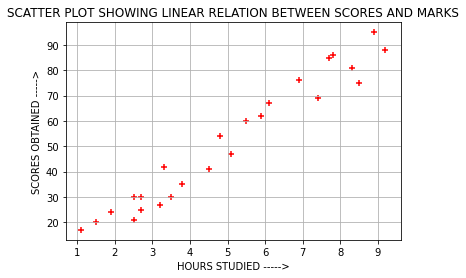

In [7]:
%matplotlib inline
plt.scatter(df['Hours Studied'],df['Scores'],color='red',marker='+')
plt.xlabel('HOURS STUDIED ----->')
plt.ylabel('SCORES OBTAINED ----->')
plt.title('SCATTER PLOT SHOWING LINEAR RELATION BETWEEN SCORES AND MARKS')
plt.grid(True)

**FOR THE CALCULATION OF LINEAR REGRESSION PARAMETER, CONVERTING Y-AXIS(SCORES) AS SERIES AND X-AXIS(HOURS STUDIED) REMAIN AS DATAFRAME**

In [8]:
new_df = df.drop('Scores',axis='columns')
new_df

,Hours Studied
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [9]:
score = df['Scores']
score

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

**APPLYING LINEAR REGRESSION MODEL** 

In [10]:
reg = linear_model.LinearRegression()
reg.fit(new_df,score)

LinearRegression()

# SCORE PREDICTION IF SOMEONE STUDIES 9.25 HOURS/DAY

In [11]:
hrs = reg.predict([[9.25]])
hrs = hrs[0]
hrs

92.90985477015731

**ANSWER AS PERCENTAGE**

In [12]:
print("If someone studies 9.25 hours/day, he might get " + str(round(hrs,2)) + "% marks")

If someone studies 9.25 hours/day, he might get 92.91% marks


**ACCURACY OF THE MODEL IN PERCENTAGE**

In [13]:
print(str(reg.score(new_df,score)*100)[:6]+" %")

95.294 %


**PARAMETERS OF THE MODEL**

In [14]:
m,b = np.polyfit(df['Hours Studied'],df['Scores'],1)
print('Slope is ',m)
print('y-intercept is ',b)

Slope is  9.775803390787473
y-intercept is  2.48367340537319


**FINDING THE LINE OF BEST FIT**

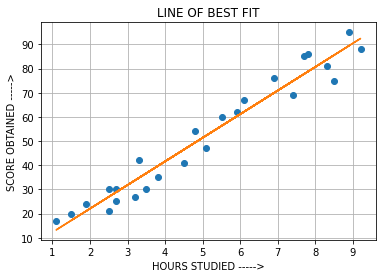

In [15]:
plt.plot(df['Hours Studied'],df['Scores'], 'o')
plt.plot(df['Hours Studied'],m*(df['Hours Studied'])+ b)
plt.xlabel('HOURS STUDIED ----->')
plt.ylabel('SCORE OBTAINED ----->')
plt.title('LINE OF BEST FIT')
plt.grid(True)

# DIVIDING INTO TRAINING AND TEST SETS HAVING 80% AND 20% DATA RESPECTIVELY

In [16]:
cdf = df[['Hours Studied','Scores']]
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

In [17]:
train_x = np.asanyarray(train[['Hours Studied']])
train_y = np.asanyarray(train[['Scores']])

**FITTING TRAINING DATA INTO THE MODEL**

In [18]:
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

**CALCULATING THE PARAMETERS OF THE TRAINING MODEL**

In [19]:
m1,b1 = np.polyfit(train['Hours Studied'],train['Scores'],1)
print('The slope is ',m1)
print('The y-intercept is ',b1)

The slope is  9.595958051793195
The y-intercept is  2.932835478643716


**SHOWING THE LINE OF BEST FIT CALCULATED FROM TRAINING DATA**

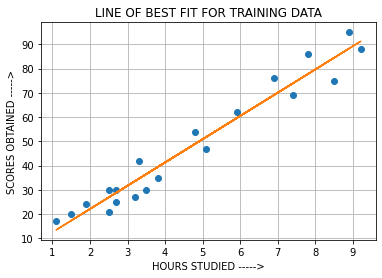

In [20]:
plt.plot(train['Hours Studied'],train['Scores'], 'o')
plt.plot(train['Hours Studied'],m1*(train['Hours Studied'])+ b1)
plt.xlabel('HOURS STUDIED ----->')
plt.ylabel('SCORES OBTAINED ----->')
plt.title('LINE OF BEST FIT FOR TRAINING DATA')
plt.grid(True)

In [21]:
test_x = np.asanyarray(test[['Hours Studied']])
test_y = np.asanyarray(test[['Scores']])

**PREDICTING THE ACCURACY AND OTHER PARAMETERS USING THE TEST DATA TRAINED FROM ABOVE**

In [22]:
test_y_pred = regr.predict(test_x)
print("R2 Score is ",r2_score(test_y_pred,test_y))
print("Mean Square Error is ", np.mean(test_y_pred-test_y)**2)
print("Acc. is ", regr.score(test_x,test_y))

R2 Score is  0.8399612366970028
Mean Square Error is  5.112635746989465
Acc. is  0.8838864920608611


**PREDICTING THE MARKS IF SOMEONE STUDIES 9.25hrs/day FROM THE TRAINED MODEL**

In [23]:
scr= m1*9.25 + b1
scr

91.69544745773076

In [24]:
print('From the model trained, we can say that if someone studies 9.25hr/day, he/she will get ' + str(round(scr,2)) + '% marks')

From the model trained, we can say that if someone studies 9.25hr/day, he/she will get 91.7% marks


**ATTACHING THE PREDICTED SCORES COMPARING IT WITH THE ORIGINAL SCORES**

In [25]:
#test['Scores Predicted'] = test_y_pred
test

,Hours Studied,Scores
7,5.5,60
8,8.3,81
10,7.7,85
12,4.5,41
18,6.1,67
